In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
data = pd.read_csv('housing.csv')
df = pd.DataFrame(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df_encoded = pd.get_dummies(df, drop_first=True)
x = df_encoded[['median_income']]  
y = df_encoded['median_house_value']  
# print(x.head())
# print(y.head())
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

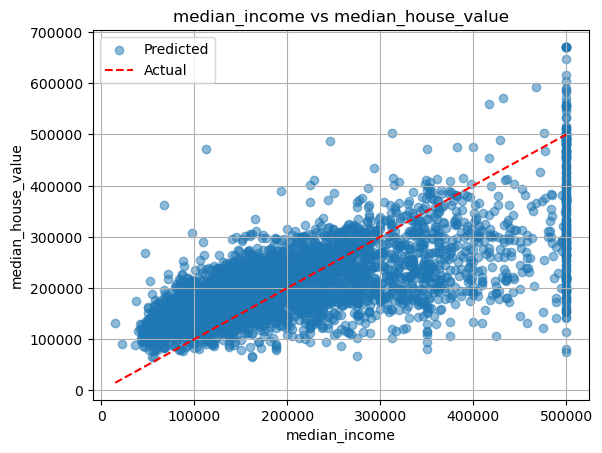

In [62]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('median_income vs median_house_value')
plt.legend(['Predicted', 'Actual'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.grid(True)
plt.show()

In [63]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 7221011204.235033
Mean Absolute Error (MAE): 63374.551304332555
R² Score: 0.47196228574894983


In [64]:
x = df_encoded[['median_income', 'housing_median_age',
                 'total_rooms', 'total_bedrooms', 'population',
                   'households', 'longitude', 'latitude']]  
y = df_encoded['median_house_value']  
print(x.head())
print(y.head())

   median_income  housing_median_age  total_rooms  total_bedrooms  population  \
0         8.3252                41.0        880.0           129.0       322.0   
1         8.3014                21.0       7099.0          1106.0      2401.0   
2         7.2574                52.0       1467.0           190.0       496.0   
3         5.6431                52.0       1274.0           235.0       558.0   
4         3.8462                52.0       1627.0           280.0       565.0   

   households  longitude  latitude  
0       126.0    -122.23     37.88  
1      1138.0    -122.22     37.86  
2       177.0    -122.24     37.85  
3       219.0    -122.25     37.85  
4       259.0    -122.25     37.85  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

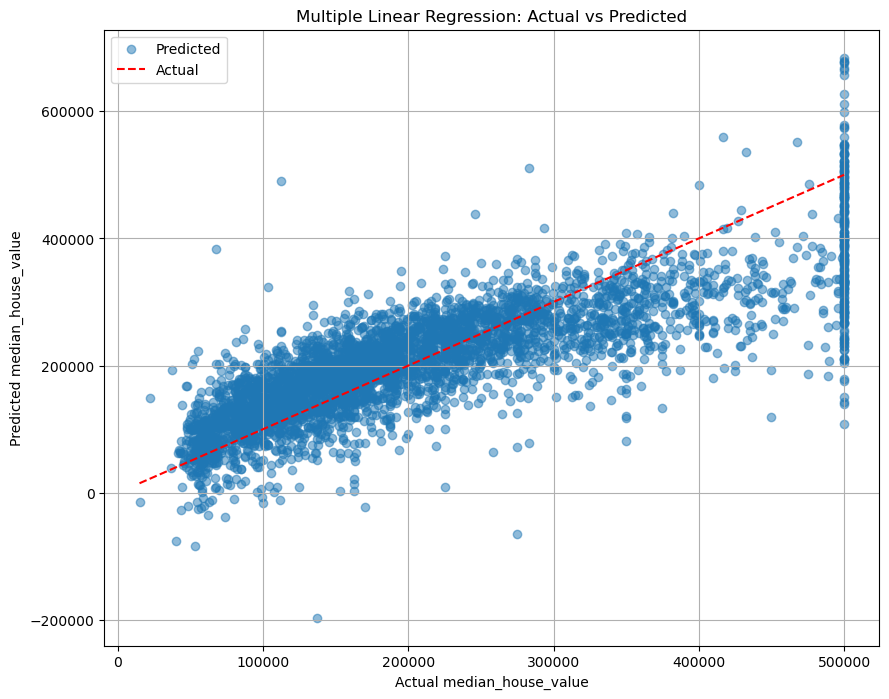

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'--r')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual median_house_value')
plt.ylabel('Predicted median_house_value')
plt.legend(['Predicted', 'Actual'])
plt.grid(True)
plt.show()

In [67]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 4921881237.628144
Mean Absolute Error (MAE): 51372.67217050058
R² Score: 0.6400865688993738


In [68]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [69]:
model_test = joblib.load("model.pkl")
y_pred = model_test.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 4921881237.628144
Mean Absolute Error (MAE): 51372.67217050058
R² Score: 0.6400865688993738
